Trabajaremos con datos
de clientes de un centro comercial que incluyen sus ingresos anuales e índices de gastos.

**Objetivo**

Agrupar a los
clientes en diferentes clústeres basándonos en su comportamiento de compra.

• Visualizaremos los clústeres resultantes en un diagrama de dispersión, diferenciando a los clientes según su agrupación.

Me he apoyado tanto en el EDA como en el codigo en la herramienta de **Estudio LM** usando un modelo
Deepseek R1 0528 Qwen3 8B al cual le hice un rag con este documento oficial del gobierno de España https://datos.gob.es/sites/default/files/doc/file/analisis_exploratorio_de_datos_2021.pdf.

Dado que en un caso "real" la información del dataset se mantendría en local siendo más seguro para la empresa y con el RAG nos aseguraríamos que nos arrojase el modelo la información tal como la necesitamos


Aunque sé que este curso no es de IA generativa me pareció interesante utilizar este recurso.


Como observación, el modelo no fue capaz de darme tan bien detalles de EDA o del codigo como Cloud Sonet 4 o cualquiera de OpenIA.



In [4]:
#Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Modelo


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import MinMaxScaler



In [5]:
# Cargar datos
df = pd.read_csv('Mall_Customers.csv')
print(df.head())
print ("*"*50)
print(df.info())
print ("*"*50)
print("Tipos de datos")
print(df.dtypes)
print ("*"*50)
print("Nombres de columnas:")
print(df.columns.tolist())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


**Podemos observar que tenemos un dataset de 200 entradas(bastante poco), el cual tiene 5 columnas CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', en las cuales no existen valores nulos**

**Todos los valores son del tipo numérico entero excepto la categoría de género que es object, lo cual se mapeará más adelante**

In [6]:
print("\nEstadísticas descriptivas - Variables numéricas:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].describe().round(2))

print("\n Estadísticas descriptivas - Variable categórica (Genre):")
print(df['Genre'].value_counts())
print(f"\nPorcentaje por género:")
print((df['Genre'].value_counts(normalize=True) * 100).round(2))


Estadísticas descriptivas - Variables numéricas:
       CustomerID     Age  Annual Income (k$)  Spending Score (1-100)
count      200.00  200.00              200.00                  200.00
mean       100.50   38.85               60.56                   50.20
std         57.88   13.97               26.26                   25.82
min          1.00   18.00               15.00                    1.00
25%         50.75   28.75               41.50                   34.75
50%        100.50   36.00               61.50                   50.00
75%        150.25   49.00               78.00                   73.00
max        200.00   70.00              137.00                   99.00

 Estadísticas descriptivas - Variable categórica (Genre):
Genre
Female    112
Male       88
Name: count, dtype: int64

Porcentaje por género:
Genre
Female    56.0
Male      44.0
Name: proportion, dtype: float64


En este estudio podemos ver que hay más datos recogidos de mujeres que de hombres, y la edad promedio es de 38 años, así como el gasto promedio es de $50

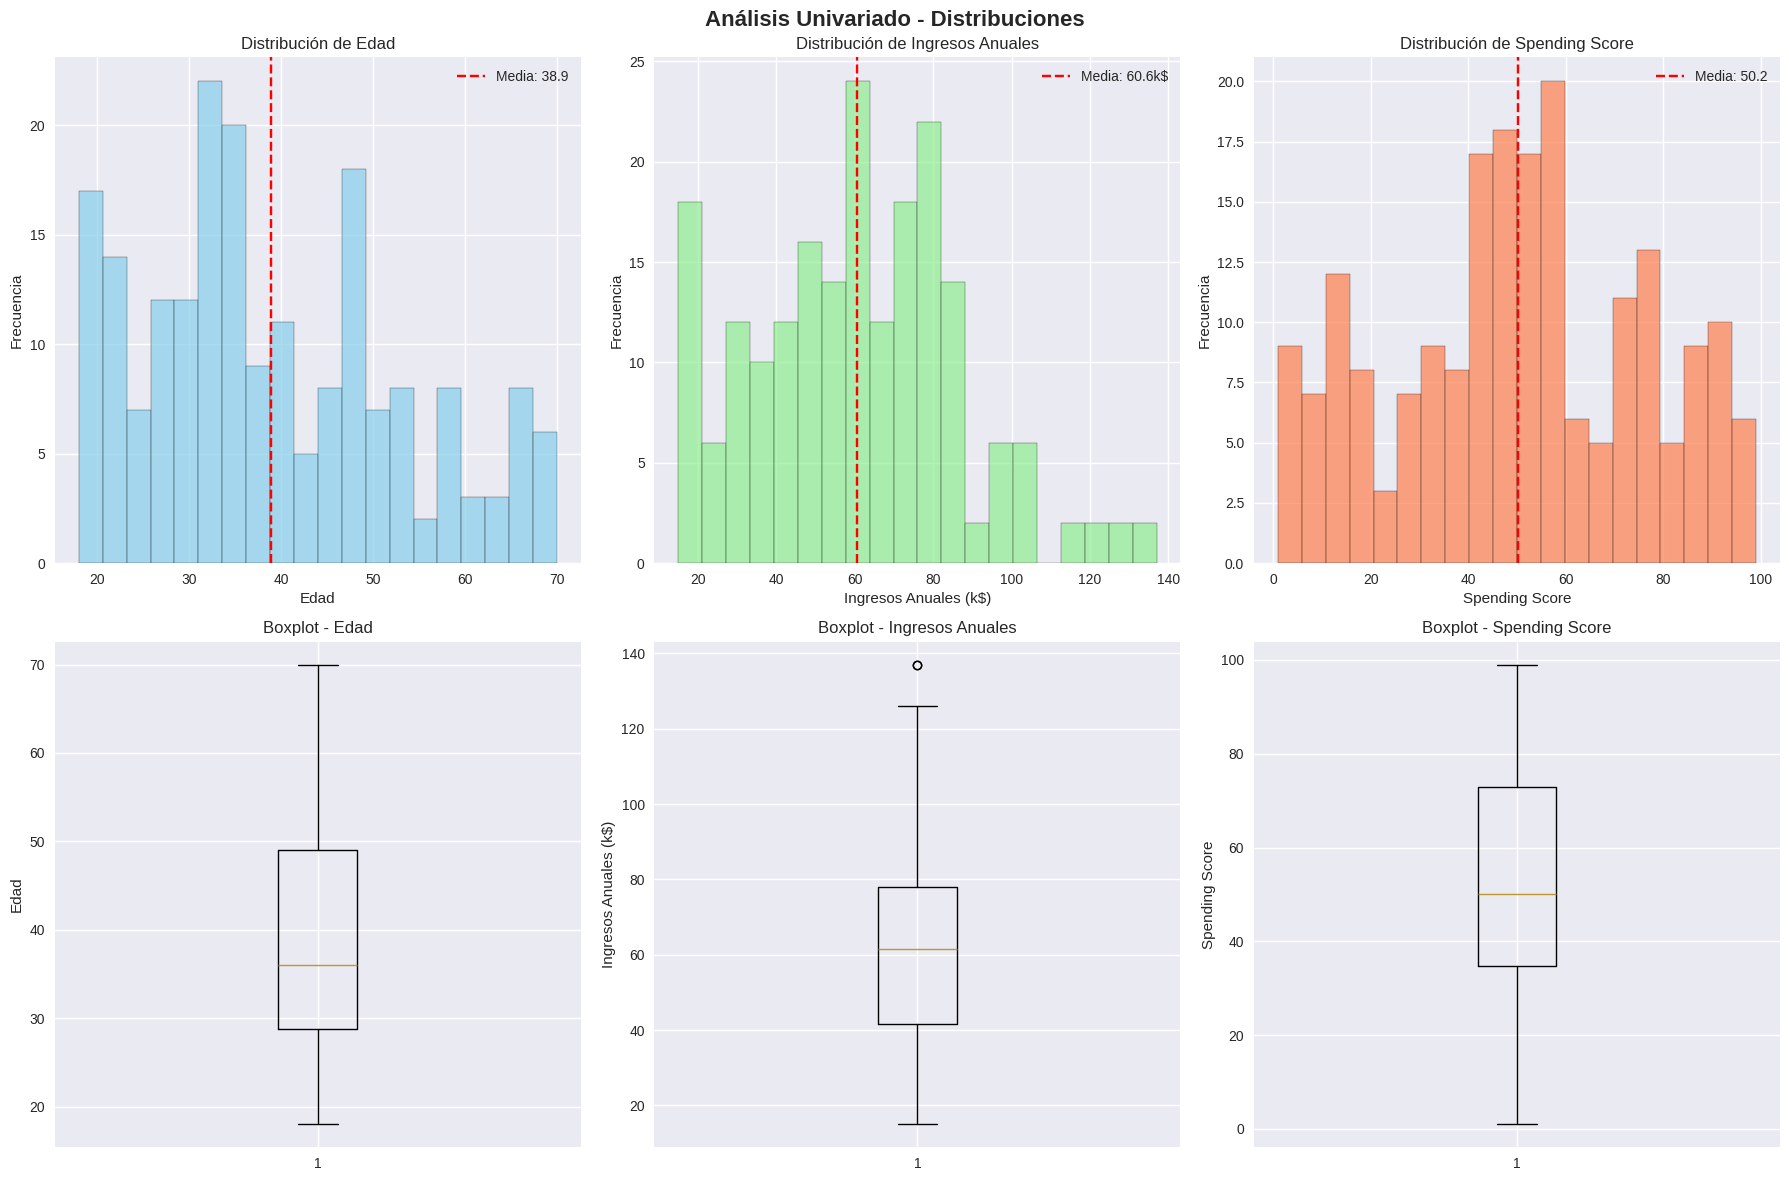

In [7]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Univariado - Distribuciones', fontsize=16, fontweight='bold')


# Distribución de Edad
axes[0,0].hist(df['Age'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribución de Edad')
axes[0,0].set_xlabel('Edad')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Media: {df["Age"].mean():.1f}')
axes[0,0].legend()

# Distribución de Ingresos Anuales
axes[0,1].hist(df['Annual Income (k$)'], bins=20, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribución de Ingresos Anuales')
axes[0,1].set_xlabel('Ingresos Anuales (k$)')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--',
                  label=f'Media: {df["Annual Income (k$)"].mean():.1f}k$')
axes[0,1].legend()

# Distribución de Spending Score
axes[0,2].hist(df['Spending Score (1-100)'], bins=20, edgecolor='black', alpha=0.7, color='coral')
axes[0,2].set_title('Distribución de Spending Score')
axes[0,2].set_xlabel('Spending Score')
axes[0,2].set_ylabel('Frecuencia')
axes[0,2].axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--',
                  label=f'Media: {df["Spending Score (1-100)"].mean():.1f}')
axes[0,2].legend()

# Boxplots
axes[1,0].boxplot(df['Age'])
axes[1,0].set_title('Boxplot - Edad')
axes[1,0].set_ylabel('Edad')

axes[1,1].boxplot(df['Annual Income (k$)'])
axes[1,1].set_title('Boxplot - Ingresos Anuales')
axes[1,1].set_ylabel('Ingresos Anuales (k$)')

axes[1,2].boxplot(df['Spending Score (1-100)'])
axes[1,2].set_title('Boxplot - Spending Score')
axes[1,2].set_ylabel('Spending Score')

plt.tight_layout()
plt.show()



En el análisis univariado observamos que los datos están bastante bien distribuidos, con una esasa de presencia de outlayers, solamente en **Ingresos Anuales**, lo cual no ha de ser un error ni un valor mal ingresado, ya que tiene lógica por la naturaleza de este dato

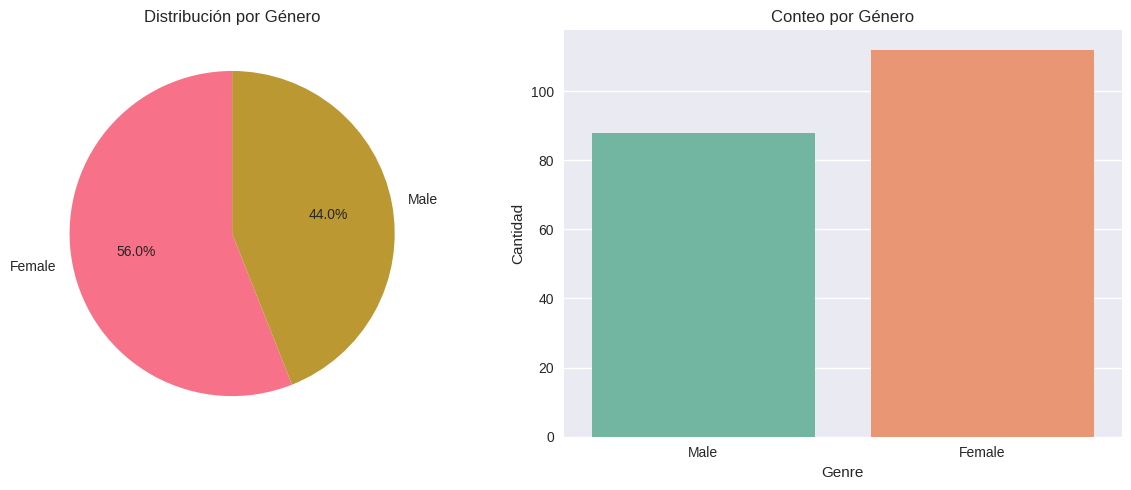

In [8]:

# Análisis de la variable categórica
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
genre_counts = df['Genre'].value_counts()
plt.pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por Género')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Genre', palette='Set2')
plt.title('Conteo por Género')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

Este gráfico ratifica lo que ya hemos evidanciado antes, hay mayor cantidad de mujeres en los datos recogidos, sin embargo no es una diferencia extrema


 Age:
  - Límite inferior: -1.62
  - Límite superior: 79.38
  - Número de outliers: 0

 Annual Income (k$):
  - Límite inferior: -13.25
  - Límite superior: 132.75
  - Número de outliers: 2
  - Porcentaje de outliers: 1.00%

 Spending Score (1-100):
  - Límite inferior: -22.62
  - Límite superior: 130.38
  - Número de outliers: 0


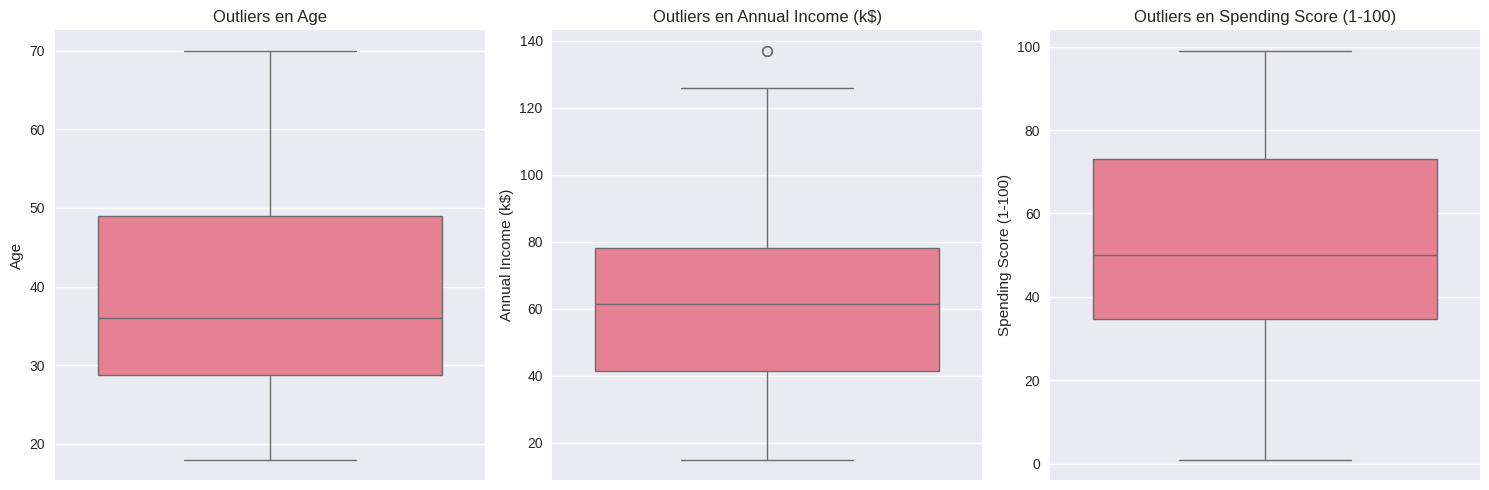

In [9]:
#ANÁLISIS DE OUTLIERS
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in numeric_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n {col}:")
    print(f"  - Límite inferior: {lower:.2f}")
    print(f"  - Límite superior: {upper:.2f}")
    print(f"  - Número de outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  - Porcentaje de outliers: {(len(outliers)/len(df)*100):.2f}%")

# Visualización de outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Outliers en {col}')

plt.tight_layout()
plt.show()

No existen outlayers significativos

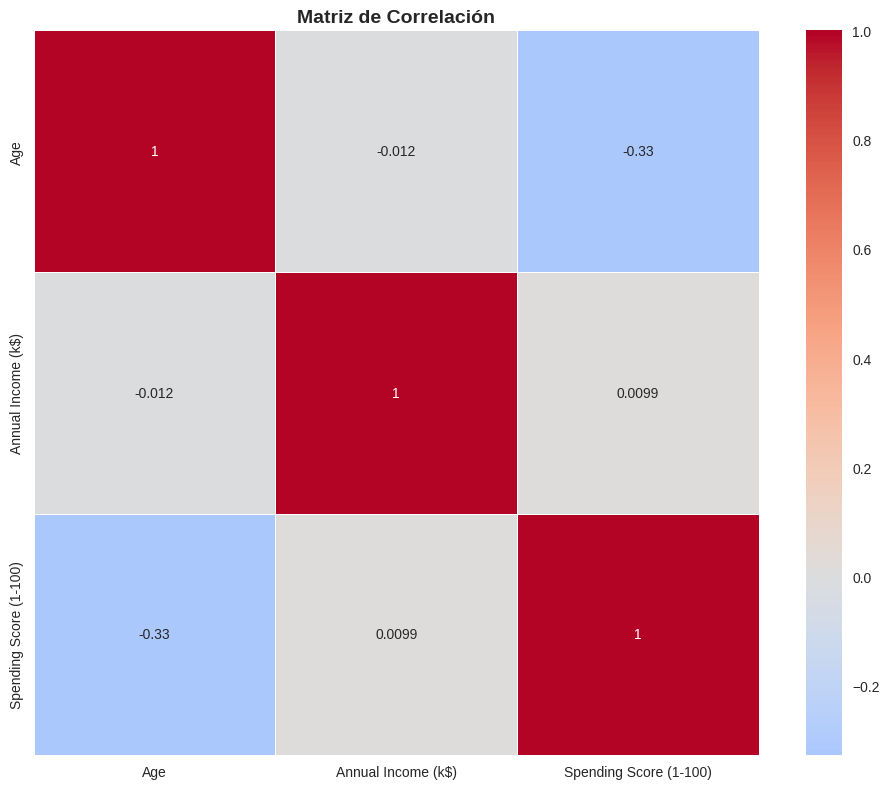


📊 Correlaciones:
                          Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000              -0.012                  -0.327
Annual Income (k$)     -0.012               1.000                   0.010
Spending Score (1-100) -0.327               0.010                   1.000


In [10]:
# ANÁLISIS DE CORRELACIONES

# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Correlaciones:")
print(correlation_matrix.round(3))

En la matriz de correlaciones se puede ver que una de las relaciones más significativas es la del Score de gastos y la edad (-0.32)

Los demas datos tienen baja corrrelación entre sí y con la variable objetivo

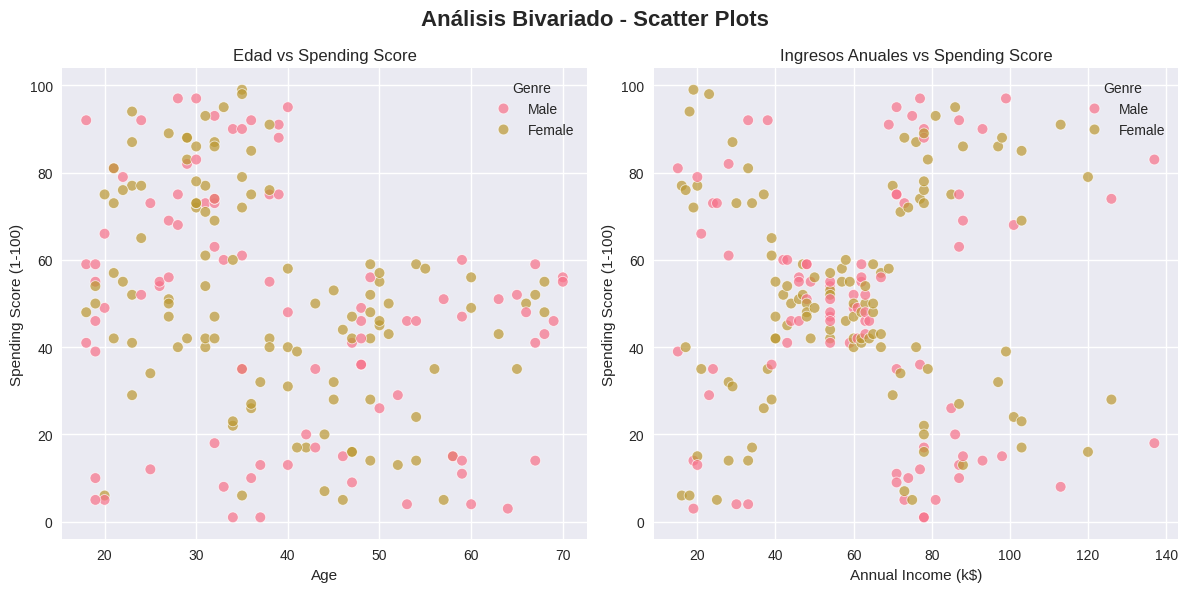

In [11]:


# Scatter plots
fig, axes = plt.subplots(1,2, figsize=(12,6))
fig.suptitle('Análisis Bivariado - Scatter Plots', fontsize=16, fontweight='bold')


# Age vs Spending Score
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Genre', ax=axes[0], s=60, alpha=0.7)
axes[0].set_title('Edad vs Spending Score')

# Annual Income vs Spending Score
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', ax=axes[1], s=60, alpha=0.7)
axes[1].set_title('Ingresos Anuales vs Spending Score')


plt.tight_layout()
plt.show()

Podemos evidenciar lo que ya nos arrojó la matriz de correlaciones, no existe una correlación lineal entre la edad y el promedio de gastos, ni en cuanto a los ingresos anuales.

Tampoco hay correlaciones entre promedio de ventas y género en cuanto al género.

Sin embargo se puede observar que hay **datos agrupados**  entorno a los ingresos anuales y el promedio de gastos como se observa en la segunda gráfica.

# Modelo

In [13]:
#eliminamos las todas las columnas excepto ingresos anuales e índice de gastos
df = df.drop(['Genre', 'Age', 'Age_Group', 'Income_Category', 'Spending_Category'], axis=1)

KeyError: "['Age_Group', 'Income_Category', 'Spending_Category'] not found in axis"


Datos escalados usando MinMaxScaler.
Primeras 5 filas de los datos escalados:
[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]]


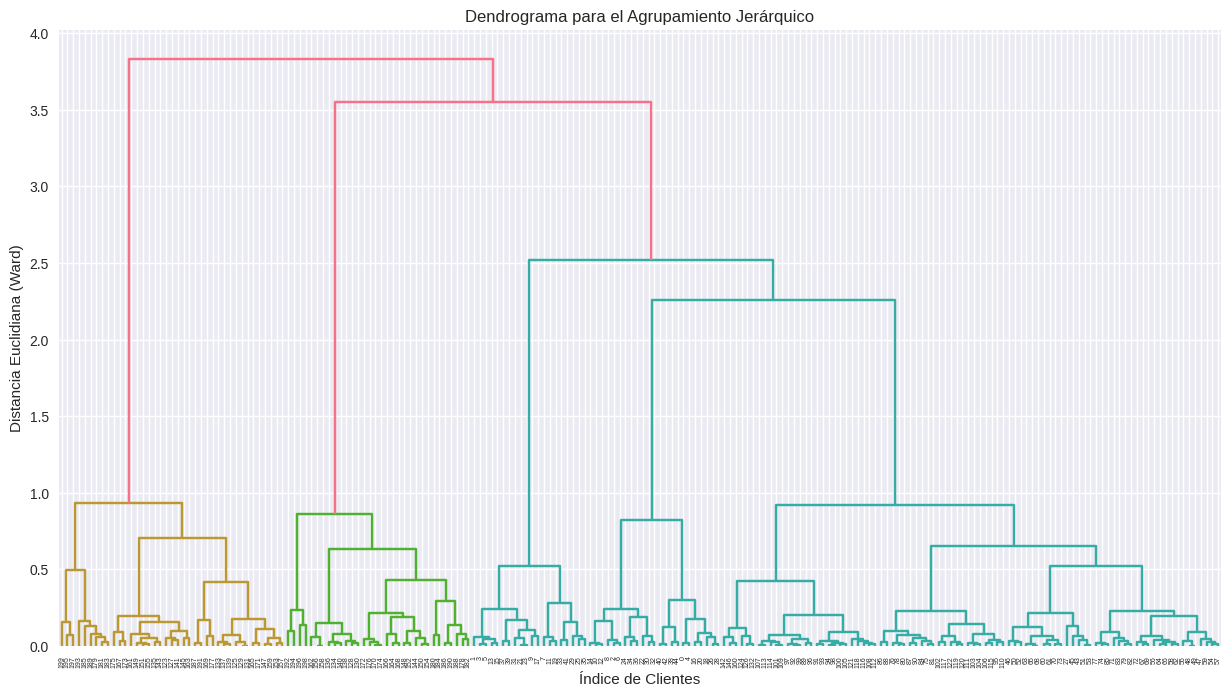

In [14]:
# Dendograma para generar un gráfico que muestra cómo se agrupan los clientes de manera jerárquica.

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Escalamos los datos usando min-max scaler

from sklearn.preprocessing import MinMaxScaler


# Escalar los datos usando MinMaxScaler
scaler_minmax = MinMaxScaler()
X_scaled = scaler_minmax.fit_transform(X)

print("\nDatos escalados usando MinMaxScaler.")
print("Primeras 5 filas de los datos escalados:")
print(X_scaled[:5])


# Generar el dendrograma

# Utilizamos la distancia euclidiana ('euclidean') y el criterio de enlace 'ward'
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top')
plt.title('Dendrograma para el Agrupamiento Jerárquico')
plt.xlabel('Índice de Clientes')
plt.ylabel('Distancia Euclidiana (Ward)')
plt.show()


Si trazamos una línea horizontal a la altura entre 4 y 6, interceptaría **5** líneas verticales sin cruzar ninguna línea horizontal.

Esta sería la división óptima.

*A esta altura, los grupos estarán bien diferenciados
Captura la estructura natural de los datos
Evita tanto el sub-agrupamiento como el sobre-agrupamiento
Las distancias intra-clúster son menores que las inter-clúster*

#Modelo

In [15]:
# Seleccionamos las variables relevantes para el clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [16]:
 #rAgrupamiento jerárquico aglomerativo.

from sklearn.cluster import AgglomerativeClustering

modelo_hclust_ward = AgglomerativeClustering(
                            linkage  = 'ward',
                            distance_threshold = None, # Set to None when n_clusters is specified
                            n_clusters         = 5
                     )
modelo_hclust_ward.fit(X=X_scaled)
# AgglomerativeClustering(distance_threshold=0, n_clusters=5) # This line is not needed

AgglomerativeClustering(n_clusters=5)


 Clústeres asignados a cada cliente.

Distribución de clientes por clúster:
Cluster
0    39
1    86
2    32
3    20
4    23
Name: count, dtype: int64


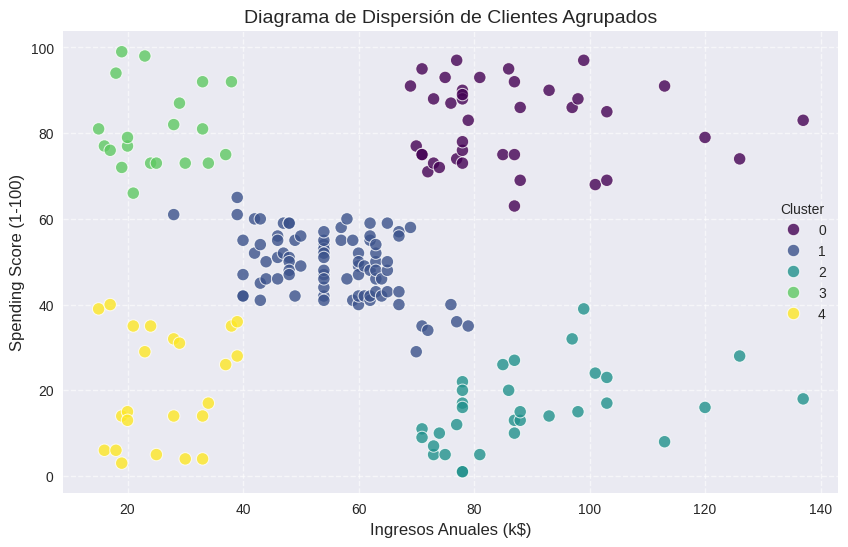

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     86.54                   82.13
1                     55.49                   49.27
2                     89.41                   15.59
3                     24.95                   81.00
4                     26.30                   20.91


In [20]:
# Diagrama de dispersión para visualizar los diferentes grupos de clientes.

# Agregar las etiquetas de los clústeres al DataFrame original
df['Cluster'] = modelo_hclust_ward.labels_

print("\n Clústeres asignados a cada cliente.")
print("\nDistribución de clientes por clúster:")
print(df['Cluster'].value_counts().sort_index())

# Visualizar los clústeres en un diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=80, alpha=0.8, legend='full')

plt.title('Diagrama de Dispersión de Clientes Agrupados', fontsize=14)
plt.xlabel('Ingresos Anuales (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Análisis de los clústeres

cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
print(cluster_summary)



Podemos observar que:

Clúster 0: Ingresos Medios->Gasto Medio

Clúster 1: Ingresos Altos **pero** Gasto Bajo

Clúster 2: Ingresos Bajos ->Gasto Bajo

Clúster 3:  Ingresos Bajos **pero** Gasto Alto

Clúster 4: Ingresos Altos-> Gasto Alto (potencial)

La mayor parte de los clientes se encuentran en el Clúster 1:

Ingresos Altos **pero** Gasto Bajo

¿Tacaños?